In [1]:
import os, shutil

base_dir = '세선화원본'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
train_3_dir = os.path.join(train_dir, '3')
train_4_dir = os.path.join(train_dir, '4')
train_5_dir = os.path.join(train_dir, '5')
train_6_dir = os.path.join(train_dir, '6')
train_7_dir = os.path.join(train_dir, '7')
train_8_dir = os.path.join(train_dir, '8')
train_9_dir = os.path.join(train_dir, '9')


validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')
validation_2_dir = os.path.join(validation_dir, '2')
validation_3_dir = os.path.join(validation_dir, '3')
validation_4_dir = os.path.join(validation_dir, '4')
validation_5_dir = os.path.join(validation_dir, '5')
validation_6_dir = os.path.join(validation_dir, '6')
validation_7_dir = os.path.join(validation_dir, '7')
validation_8_dir = os.path.join(validation_dir, '8')
validation_9_dir = os.path.join(validation_dir, '9')


test_0_dir = os.path.join(test_dir, '0')
test_1_dir = os.path.join(test_dir, '1')
test_2_dir = os.path.join(test_dir, '2')
test_3_dir = os.path.join(test_dir, '3')
test_4_dir = os.path.join(test_dir, '4')
test_5_dir = os.path.join(test_dir, '5')
test_6_dir = os.path.join(test_dir, '6')
test_7_dir = os.path.join(test_dir, '7')
test_8_dir = os.path.join(test_dir, '8')
test_9_dir = os.path.join(test_dir, '9')

In [2]:
print('훈련용 0 이미지 전체 개수 : ', len(os.listdir(train_0_dir)))

print('검증용 0 이미지 전체 개수 : ', len(os.listdir(validation_0_dir)))

print('테스트용 0 이미지 전체 개수 : ', len(os.listdir(test_0_dir)))


훈련용 0 이미지 전체 개수 :  5000
검증용 0 이미지 전체 개수 :  2300
테스트용 0 이미지 전체 개수 :  1600


In [7]:
from keras import layers
from keras import models
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(64,(6,6), activation='relu',
                       input_shape=(50,50,3)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10,activation='softmax'))

In [8]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(50,50),batch_size=32, class_mode='categorical')

Found 50000 images belonging to 10 classes.
Found 23000 images belonging to 10 classes.


In [10]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 252ms/step - loss: 1.1567 - acc: 0.6231 - val_loss: 0.8022 - val_acc: 0.7588
Epoch 2/100
100/100 [==============================] - 22s 221ms/step - loss: 0.5892 - acc: 0.8178 - val_loss: 0.6781 - val_acc: 0.7906
Epoch 3/100
100/100 [==============================] - 23s 229ms/step - loss: 0.4010 - acc: 0.8806 - val_loss: 0.4466 - val_acc: 0.8894
Epoch 4/100
100/100 [==============================] - 22s 220ms/step - loss: 0.3573 - acc: 0.8950 - val_loss: 0.3913 - val_acc: 0.8900
Epoch 5/100
100/100 [==============================] - 22s 221ms/step - loss: 0.2510 - acc: 0.9209 - val_loss: 0.2749 - val_acc: 0.9175
Epoch 6/100
100/100 [==============================] - 22s 220ms/step - loss: 0.2359 - acc: 0.9303 - val_loss: 0.3519 - val_acc: 0.9031
Epoch 7/100
100/100 [==============================] - 22s 224ms/step - loss: 0.2042 - acc: 0.9347 - val_loss: 0.3258 - val_acc: 0.9050
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0315 - acc: 0.9884 - val_loss: 0.2045 - val_acc: 0.9525
Epoch 62/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0413 - acc: 0.9856 - val_loss: 0.2305 - val_acc: 0.9525
Epoch 63/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0388 - acc: 0.9872 - val_loss: 0.2117 - val_acc: 0.9556
Epoch 64/100
100/100 [==============================] - 12s 115ms/step - loss: 0.0291 - acc: 0.9903 - val_loss: 0.2582 - val_acc: 0.9475
Epoch 65/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.1829 - val_acc: 0.9556
Epoch 66/100
100/100 [==============================] - 11s 115ms/step - loss: 0.0249 - acc: 0.9909 - val_loss: 0.3127 - val_acc: 0.9350
Epoch 67/100
100/100 [==============================] - 12s 116ms/step - loss: 0.0365 - acc: 0.9897 - val_loss: 0.2218 - val_acc: 0.9444
Epoch 68/100
100/100 [===================

In [11]:
model.save('number_skel2.h5')

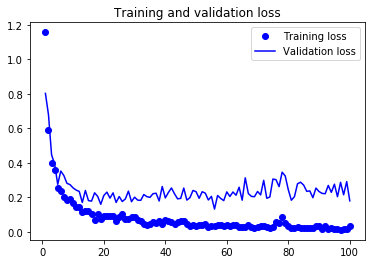

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

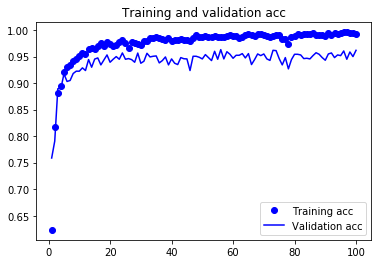

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.show()

In [11]:
import glob
from PIL import Image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import load_model
model = load_model('number_painting.h5')

test_generator = test_datagen.flow_from_directory(test_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)


# img_path='정규화원본/test/0/normalizationSF61527.bmp'
# img = image.load_img(img_path,target_size=(50,50))
# plt.imshow(img)

# x=image.img_to_array(img)
# x=np.expand_dims(x,axis=0)
# x=x/255.



    
# prediction =model.predict_classes(x)
# #prediction =model.predict(x)
# print(prediction)
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

Found 16000 images belonging to 10 classes.


In [12]:
print(predict)

[[1.4805024e-12 1.1785224e-07 6.3136611e-09 ... 2.8993970e-08
  9.0014958e-04 9.9857461e-01]
 [1.9701421e-20 1.5478572e-13 1.1277125e-08 ... 7.4333890e-14
  2.8034918e-13 2.0277668e-09]
 [2.1695259e-08 1.2088515e-10 9.9999952e-01 ... 3.1641762e-12
  8.7501579e-09 9.3021780e-12]
 ...
 [1.1762357e-08 6.4647296e-09 9.8120683e-01 ... 5.0785470e-15
  1.4821206e-02 1.2623608e-10]
 [1.9819144e-12 4.4178825e-09 8.0529509e-07 ... 2.5734730e-18
  3.7482283e-07 1.5394195e-14]
 [9.9963963e-01 2.8910181e-05 3.3125063e-04 ... 1.5962215e-07
  1.7784911e-08 6.5505856e-12]]


In [14]:
test_generator = test_datagen.flow_from_directory(test_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')
score=model.evaluate(test_generator)

Found 16000 images belonging to 10 classes.
500/500 [==============================] - 85s 169ms/step


In [15]:
print(score)

[0.15757417926716788, 0.9645]
